# Moving From Digits to Fashion:
This notebook will take techniques learned in the previous notebook and apply them to a slightly harder data set: MNIST Fashion.

In [84]:
import torch
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms
import numpy as np

from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns



sns.set_palette(sns.color_palette("Blues_d", n_colors=10, desat=1))

ModuleNotFoundError: No module named 'based_sequential'

In [4]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting C:\Users\WNeill/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\WNeill/.pytorch/F_MNIST_data/FashionMNIST\raw


Extracting C:\Users\WNeill/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\WNeill/.pytorch/F_MNIST_data/FashionMNIST\raw


Extracting C:\Users\WNeill/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\WNeill/.pytorch/F_MNIST_data/FashionMNIST\raw


Extracting C:\Users\WNeill/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\WNeill/.pytorch/F_MNIST_data/FashionMNIST\raw
Processing...
Done!


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


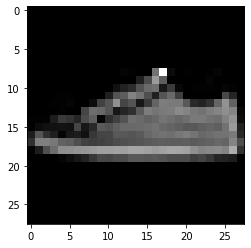

In [5]:
# Load batch and take a look at a sample image:
train_iter = iter(trainloader)
images, labels = train_iter.next()

image_0 = images[0].squeeze().numpy()
plt.imshow(image_0, cmap="Greys_r")

In [76]:
class Network(nn.Sequential):
    def __init__(self, layers):
        super().__init__(self.init_modules(layers))
    
    def init_modules(self, layers):
        """
        Define simple sequence of operations for feed forward based on desired
        layer architecture. 
        """
        n_layers = len(layers)
        modules = OrderedDict()

        # Layer definitions for input and inner layers:
        for i in range(n_layers - 2):
            modules[f'fc{i}']   = nn.Linear(layers[i], layers[i+1])
            modules[f'relu{i}'] = nn.ReLU()

        # Definition for output layer:
        modules['fc_out'] = nn.Linear(layers[-2], layers[-1])
        modules['smax_out'] = nn.LogSoftmax(dim=1)
        
        return modules
    
    def train(self, trainloader, epochs, plot_loss=False):
        criterion = nn.NLLLoss()
        optimizer = optim.Adam(self.parameters(), lr=0.003)
        epoch_error = []
        for e in range(epochs):
            running_loss = 0
            for x, y in trainloader:
                x = x.view(x.shape[0], -1)
                optimizer.zero_grad()
                out  = self.forward(x)
                loss = criterion(out, y)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            epoch_error.append(running_loss/len(trainloader))
        
        if plot_loss:
            plt.title('Training Loss')
            plt.xlabel('Epochs')
            plt.plot(epoch_error)   

In [80]:
# Define network architecture:
layers = (784, 392, 196, 98, 10)
model = Network(layers)
model

Network(
  (fc0): Linear(in_features=784, out_features=392, bias=True)
  (relu0): ReLU()
  (fc1): Linear(in_features=392, out_features=196, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=196, out_features=98, bias=True)
  (relu2): ReLU()
  (fc_out): Linear(in_features=98, out_features=10, bias=True)
  (smax_out): LogSoftmax()
)

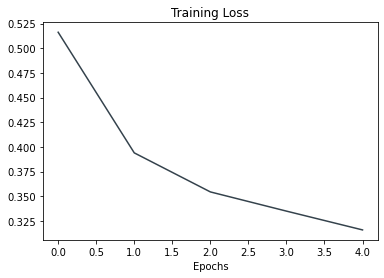

In [81]:
model.train(trainloader, 5, plot_loss=True)

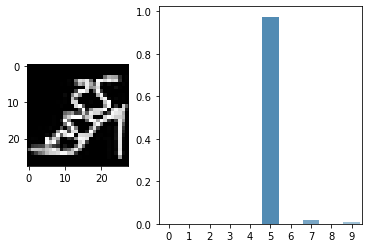

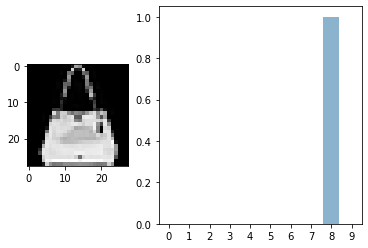

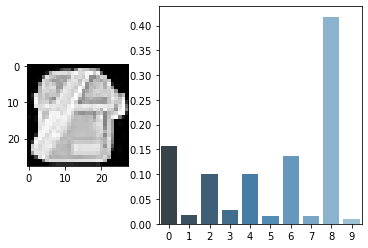

In [82]:
test_images, _ = iter(testloader).next()

for img in test_images[0:3]:
    fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios':[1,2], 'height_ratios':[1]})
    ps = torch.exp(model2(img.view(1, -1)))
    axes[0].imshow(img.numpy().squeeze(), cmap='Greys_r')
    sns.barplot(x=np.arange(10), y=ps.detach().numpy().squeeze(), ax=axes[1])
    plt.show()
